# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 05.11.2020

Мягкий дедлайн: 01:59MSK 18.11.2019

Жесткий дедлайн: 01:59MSK 22.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/21899 нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


from sklearn.metrics import accuracy_score

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

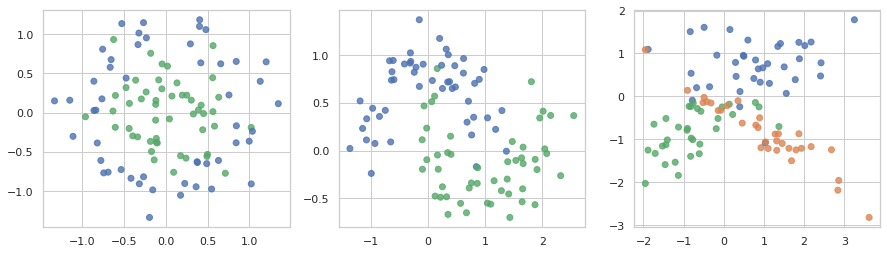

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
  plt.subplot(1, 3, i + 1)
  plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

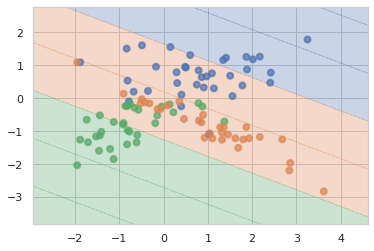

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

0.0
0.2666666666666667
0.0
0.1333333333333333
0.0
0.16666666666666663


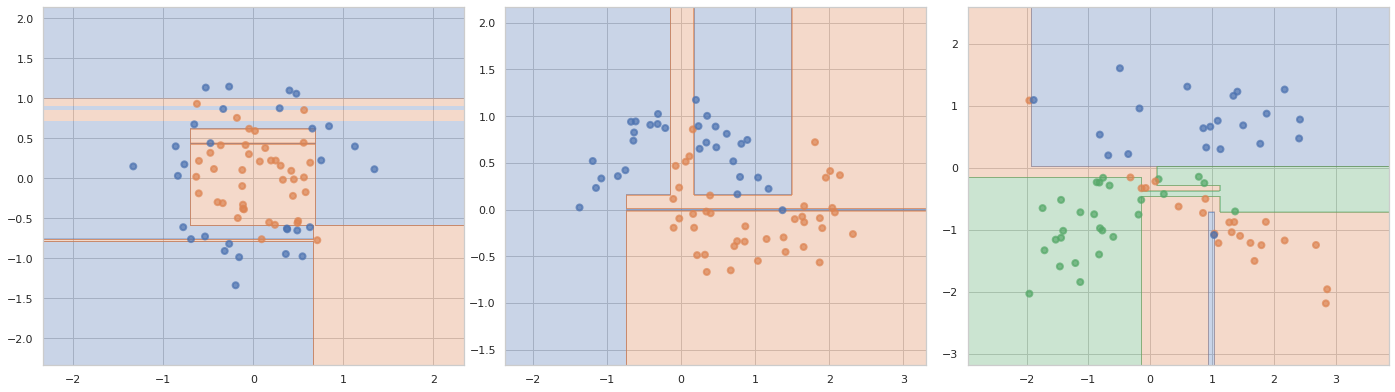

In [ ]:
plt.figure(figsize=(20, 6))
for i, (x, y) in enumerate(datasets):
  plt.subplot(1, 3, i + 1)
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
  clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
  plot_surface(clf, X_train, y_train)
  pred = clf.predict(X_test)
  print(1 - accuracy_score(y_train, clf.predict(X_train)))
  print(1 - accuracy_score(y_test, pred))

__Ответ:__ Доля ошибок на обучаюей выборке равна нулю, то ест дерево идеально обучилось, смотря на долю ошибки на тесте, можно заметить, что она в пределах 0.1 - 0.3, но все же деревья немного переобучились, потому что на графике виднеются тонкие полоски, которые отделяют маленюкую часть плоскости ради 1-2 объектов выборки.


__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Воспользовалась в данном задании функцией plot_decision_regions для построения разделяющих плоскостей, (тут не требовали конкретную использовать, извините, если я неправильно поняла), потому что хотела для каждого графика сделать подпись определенных параметров

max_depth = 3 and min_samples_leaf = 15 TRAIN
0.2142857142857143


max_depth = 3 and min_samples_leaf = 15 TEST
0.30000000000000004


max_depth = 3 and min_samples_leaf = 5 TRAIN
0.1428571428571429


max_depth = 3 and min_samples_leaf = 5 TEST
0.19999999999999996


max_depth = 3 and min_samples_leaf = 2 TRAIN
0.12857142857142856


max_depth = 3 and min_samples_leaf = 2 TEST
0.23333333333333328


max_depth = 5 and min_samples_leaf = 15 TRAIN
0.2142857142857143


max_depth = 5 and min_samples_leaf = 15 TEST
0.30000000000000004


max_depth = 5 and min_samples_leaf = 5 TRAIN
0.12857142857142856


max_depth = 5 and min_samples_leaf = 5 TEST
0.09999999999999998


max_depth = 5 and min_samples_leaf = 2 TRAIN
0.05714285714285716


max_depth = 5 and min_samples_leaf = 2 TEST
0.16666666666666663


max_depth = 7 and min_samples_leaf = 15 TRAIN
0.2142857142857143


max_depth = 7 and min_samples_leaf = 15 TEST
0.30000000000000004


max_depth = 7 and min_samples_leaf = 5 TRAIN
0.12857142857142856




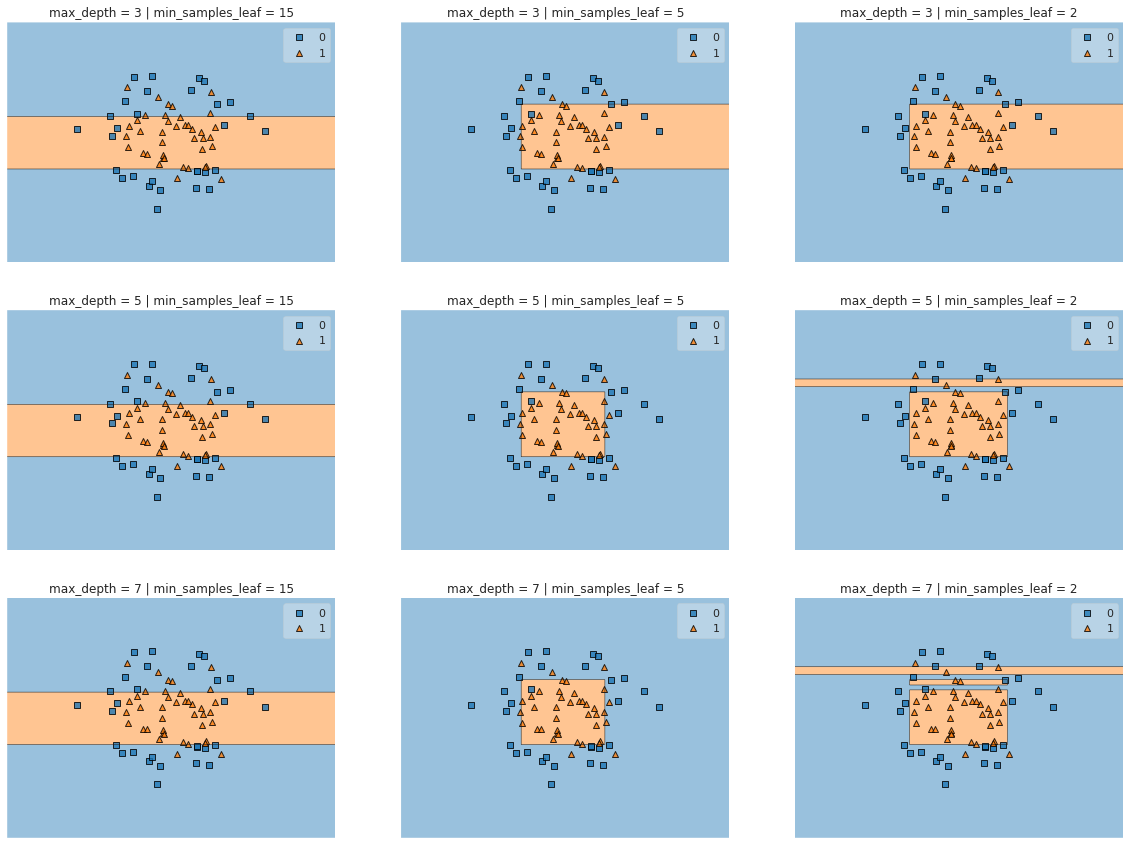

In [ ]:
from mlxtend.plotting import plot_decision_regions 
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

data = datasets[0] #Проделаем для первого датасета
x, y = data[0], data[1]
for i, max_depth in enumerate([3, 5, 7]):
    for j, min_samples_leaf in enumerate([15, 5, 2]):
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
      dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
      dt.fit(X_train, y_train)
      pred = dt.predict(X_test)
      ax[i][j].set_title('max_depth = {} | min_samples_leaf = {}'.format(max_depth, min_samples_leaf))
      ax[i][j].axis('off')
      plot_decision_regions(X_train, y_train, dt, ax=ax[i][j])
      print('max_depth = {} and min_samples_leaf = {} TRAIN'.format(max_depth, min_samples_leaf))
      print(1 - accuracy_score(y_train, dt.predict(X_train)))
      print('\n')
      print('max_depth = {} and min_samples_leaf = {} TEST'.format(max_depth, min_samples_leaf))
      print(1 - accuracy_score(y_test, pred))
      print('\n')

plt.show()

max_depth = 3 and min_samples_leaf = 15 TRAIN
0.15714285714285714


max_depth = 3 and min_samples_leaf = 15 TEST
0.19999999999999996


max_depth = 3 and min_samples_leaf = 5 TRAIN
0.11428571428571432


max_depth = 3 and min_samples_leaf = 5 TEST
0.19999999999999996


max_depth = 3 and min_samples_leaf = 2 TRAIN
0.08571428571428574


max_depth = 3 and min_samples_leaf = 2 TEST
0.16666666666666663


max_depth = 5 and min_samples_leaf = 15 TRAIN
0.15714285714285714


max_depth = 5 and min_samples_leaf = 15 TEST
0.19999999999999996


max_depth = 5 and min_samples_leaf = 5 TRAIN
0.042857142857142816


max_depth = 5 and min_samples_leaf = 5 TEST
0.2666666666666667


max_depth = 5 and min_samples_leaf = 2 TRAIN
0.014285714285714235


max_depth = 5 and min_samples_leaf = 2 TEST
0.23333333333333328


max_depth = 7 and min_samples_leaf = 15 TRAIN
0.15714285714285714


max_depth = 7 and min_samples_leaf = 15 TEST
0.19999999999999996


max_depth = 7 and min_samples_leaf = 5 TRAIN
0.042857142857142

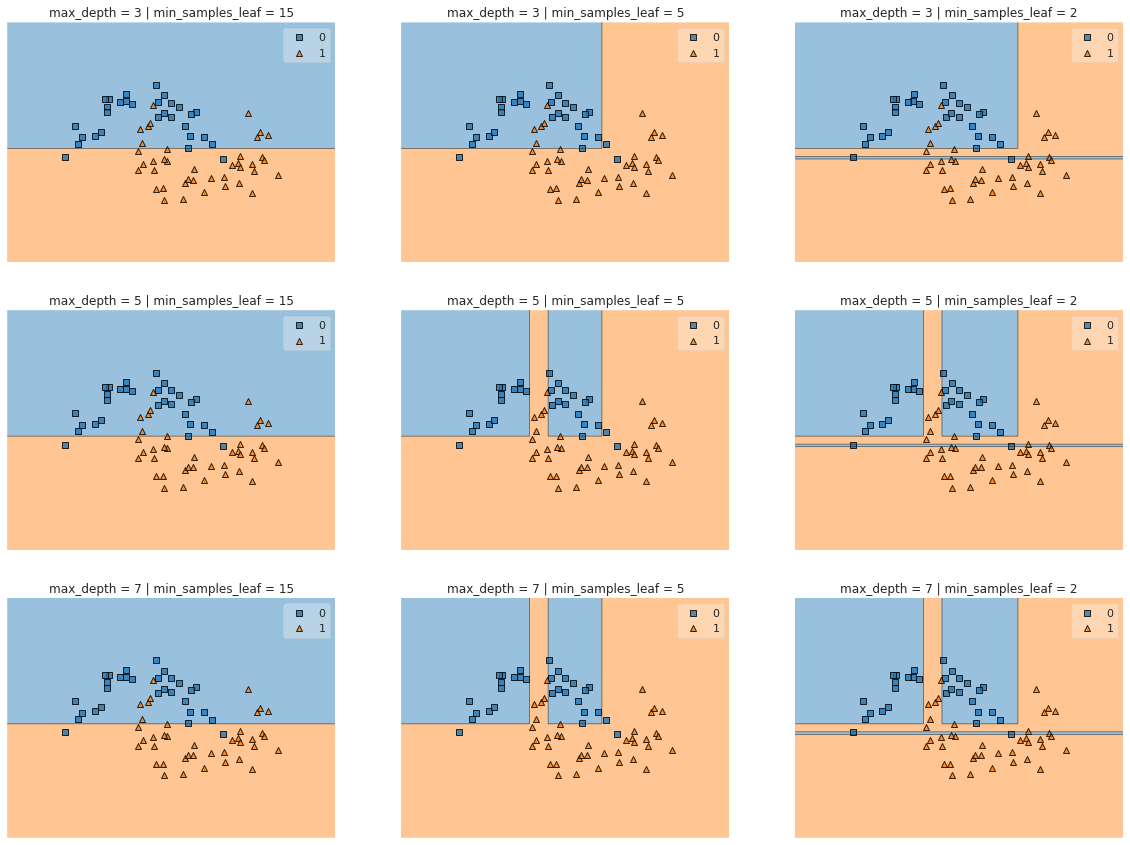

In [ ]:
from mlxtend.plotting import plot_decision_regions 
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

data = datasets[1] #Проделаем для второго датасета
x, y = data[0], data[1]
for i, max_depth in enumerate([3, 5, 7]):
    for j, min_samples_leaf in enumerate([15, 5, 2]):
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
      dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
      dt.fit(X_train, y_train)
      pred = dt.predict(X_test)
      ax[i][j].set_title('max_depth = {} | min_samples_leaf = {}'.format(max_depth, min_samples_leaf))
      ax[i][j].axis('off')
      plot_decision_regions(X_train, y_train, dt, ax=ax[i][j])
      print('max_depth = {} and min_samples_leaf = {} TRAIN'.format(max_depth, min_samples_leaf))
      print(1 - accuracy_score(y_train, dt.predict(X_train)))
      print('\n')
      print('max_depth = {} and min_samples_leaf = {} TEST'.format(max_depth, min_samples_leaf))
      print(1 - accuracy_score(y_test, pred))
      print('\n')

plt.show()

max_depth = 3 and min_samples_leaf = 15 TRAIN
0.11428571428571432


max_depth = 3 and min_samples_leaf = 15 TEST
0.23333333333333328


max_depth = 3 and min_samples_leaf = 5 TRAIN
0.11428571428571432


max_depth = 3 and min_samples_leaf = 5 TEST
0.23333333333333328


max_depth = 3 and min_samples_leaf = 2 TRAIN
0.08571428571428574


max_depth = 3 and min_samples_leaf = 2 TEST
0.1333333333333333


max_depth = 5 and min_samples_leaf = 15 TRAIN
0.11428571428571432


max_depth = 5 and min_samples_leaf = 15 TEST
0.23333333333333328


max_depth = 5 and min_samples_leaf = 5 TRAIN
0.09999999999999998


max_depth = 5 and min_samples_leaf = 5 TEST
0.30000000000000004


max_depth = 5 and min_samples_leaf = 2 TRAIN
0.08571428571428574


max_depth = 5 and min_samples_leaf = 2 TEST
0.16666666666666663


max_depth = 7 and min_samples_leaf = 15 TRAIN
0.11428571428571432


max_depth = 7 and min_samples_leaf = 15 TEST
0.23333333333333328


max_depth = 7 and min_samples_leaf = 5 TRAIN
0.09999999999999998

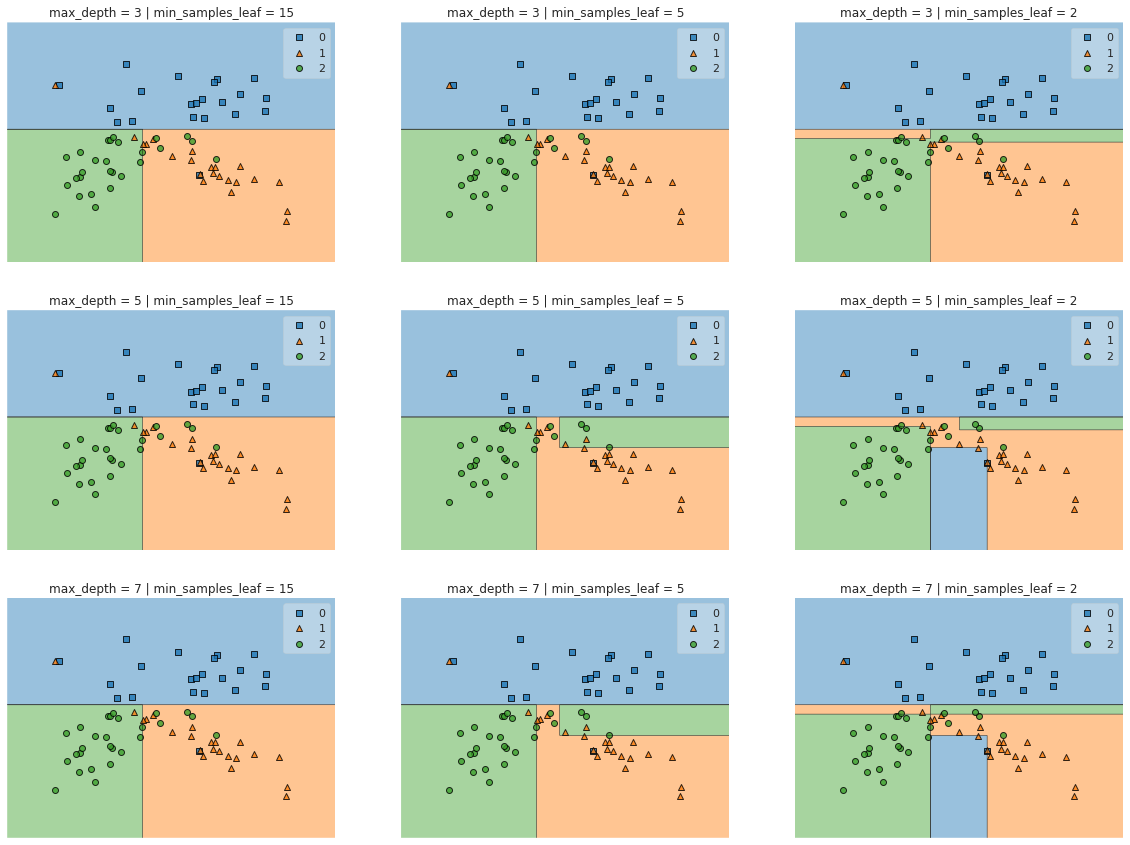

In [ ]:
from mlxtend.plotting import plot_decision_regions 
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

data = datasets[2] #Проделаем для третьего датасета
x, y = data[0], data[1]
for i, max_depth in enumerate([3, 5, 7]):
    for j, min_samples_leaf in enumerate([15, 5, 2]):
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
      dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
      dt.fit(X_train, y_train)
      pred = dt.predict(X_test)
      ax[i][j].set_title('max_depth = {} | min_samples_leaf = {}'.format(max_depth, min_samples_leaf))
      ax[i][j].axis('off')
      plot_decision_regions(X_train, y_train, dt, ax=ax[i][j])
      print('max_depth = {} and min_samples_leaf = {} TRAIN'.format(max_depth, min_samples_leaf))
      print(1 - accuracy_score(y_train, dt.predict(X_train)))
      print()
      print('max_depth = {} and min_samples_leaf = {} TEST'.format(max_depth, min_samples_leaf))
      print(1 - accuracy_score(y_test, pred))
      print()

plt.show()

__Ответ:__ Можно заметить (для любых 3 датасетов), что если зафиксировать min_samples_leaf достаточно большой, то разбиение не меняется при изменении max_depth. Это можно объяснить тем, что просто дерево заканчивает обучаться уже на маленькой глубине и даже разрешая глубину больше, у нас срабатывает критерий останова по min_samples_leaf, то есть дерево дальше глубины равной 3 просто не строится. Если посмотреть на значение min_samples_leaf = 5, то замечаем, что с увеличением глубины дерево начинает иметь уже более сложную структуру. Если взять min_samples_leaf = 2, то уже чем меньше ограничение на глубину, значинают замечаться признаки переобучения, появляются какие-то полоски посреди другого класса, то есть дерево выделяет единичные объекты, что не есть хорошо.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

https://contest.yandex.ru/contest/21899/run-report/41613150/ посылка 


__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: